In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv('cleaned_merged_meta_data.csv')

In [4]:
selected_features = [
    'Open', 'High', 'Low', 'Adj_Close', 'Volume', 'Daily_Returns',
    'Close_lag_1', 'Close_lag_2', 'Close_lag_3', 'Close_mean_5',
    'Close_std_5', 'Close_SMA_5', 'Close_EMA_5', 'RSI', 'MACD',
    'Bollinger_Bands', 'interest_rate', 'unemployment_rate', 'gdp_growth_rate'
]

target_variable = 'Close'


In [5]:
X = data[selected_features]
y = data[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Mean Squared Error: 0.004564138387225184
R-squared: 0.999999487150158


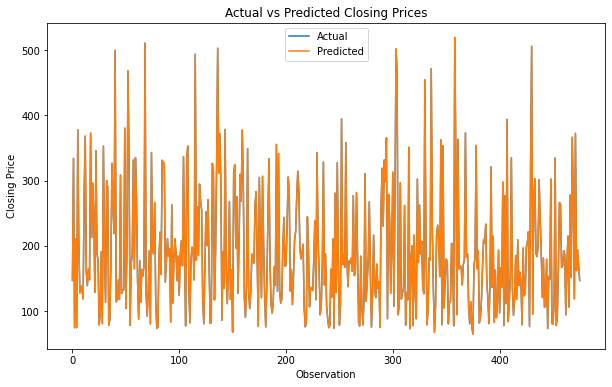

In [7]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Observation')
plt.ylabel('Closing Price')
plt.show()


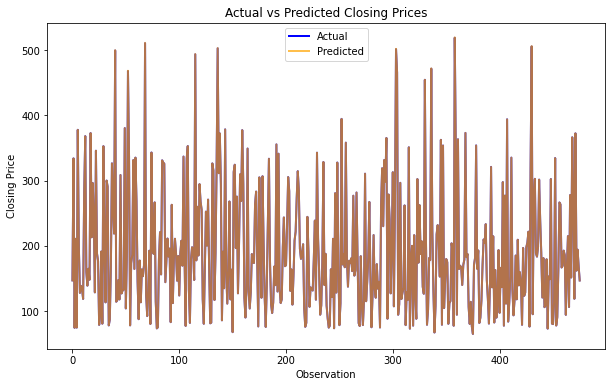

In [8]:
# Plotting the actual vs predicted values with enhanced visualization
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', linewidth=2, color='blue')
plt.plot(y_pred, label='Predicted', linewidth=2, color='orange', alpha=0.7)
plt.legend()
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Observation')
plt.ylabel('Closing Price')
plt.show()


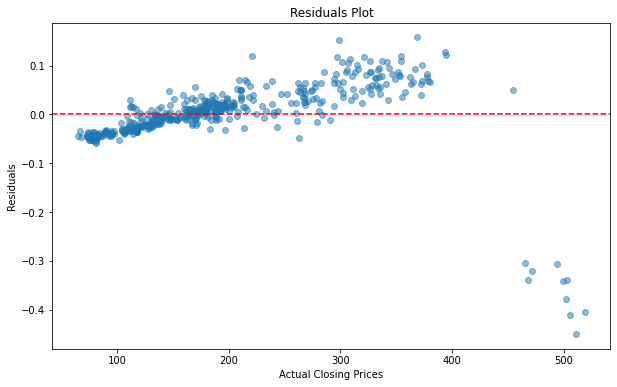

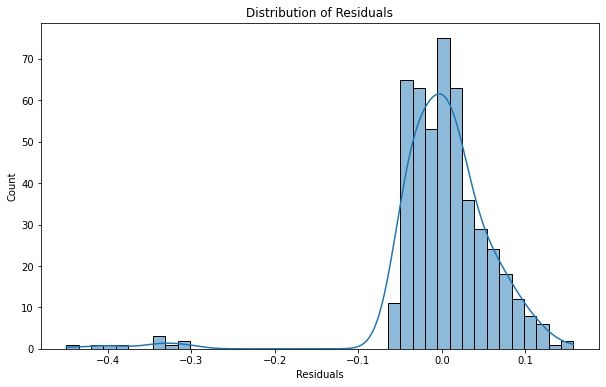

In [9]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Actual Closing Prices')
plt.ylabel('Residuals')
plt.show()

# Plot residuals distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()



Polynomial Features Model - Mean Squared Error: 2.4578171538858675
Polynomial Features Model - R-squared: 0.9997238271427866


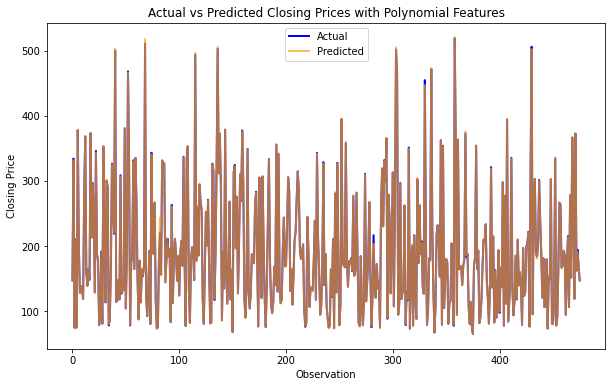

In [10]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the polynomial features dataset
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train the model with polynomial features
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Make predictions
y_pred_poly = model_poly.predict(X_test_poly)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Features Model - Mean Squared Error: {mse_poly}")
print(f"Polynomial Features Model - R-squared: {r2_poly}")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', linewidth=2, color='blue')
plt.plot(y_pred_poly, label='Predicted', linewidth=2, color='orange', alpha=0.7)
plt.legend()
plt.title('Actual vs Predicted Closing Prices with Polynomial Features')
plt.xlabel('Observation')
plt.ylabel('Closing Price')
plt.show()


Random Forest Model - Mean Squared Error: 0.28416129916876454
Random Forest Model - R-squared: 0.9999680701887133


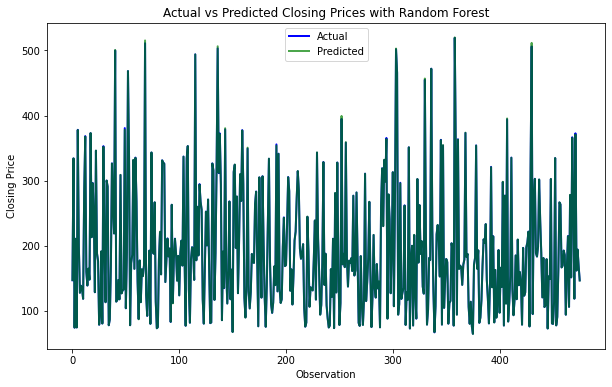

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Model - Mean Squared Error: {mse_rf}")
print(f"Random Forest Model - R-squared: {r2_rf}")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', linewidth=2, color='blue')
plt.plot(y_pred_rf, label='Predicted', linewidth=2, color='green', alpha=0.7)
plt.legend()
plt.title('Actual vs Predicted Closing Prices with Random Forest')
plt.xlabel('Observation')
plt.ylabel('Closing Price')
plt.show()


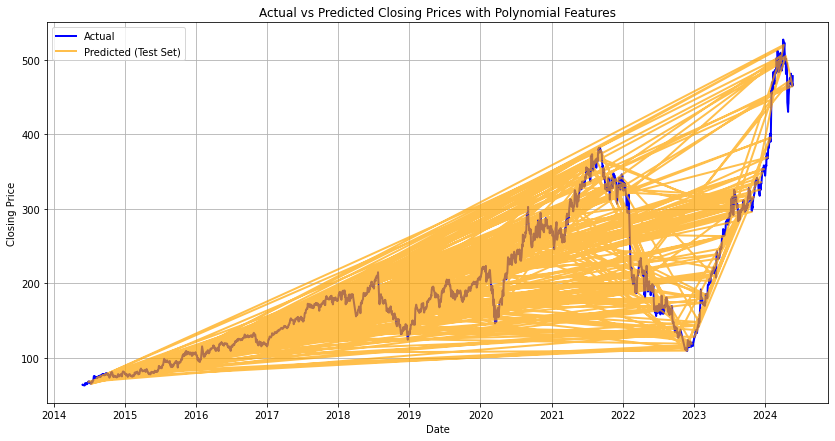

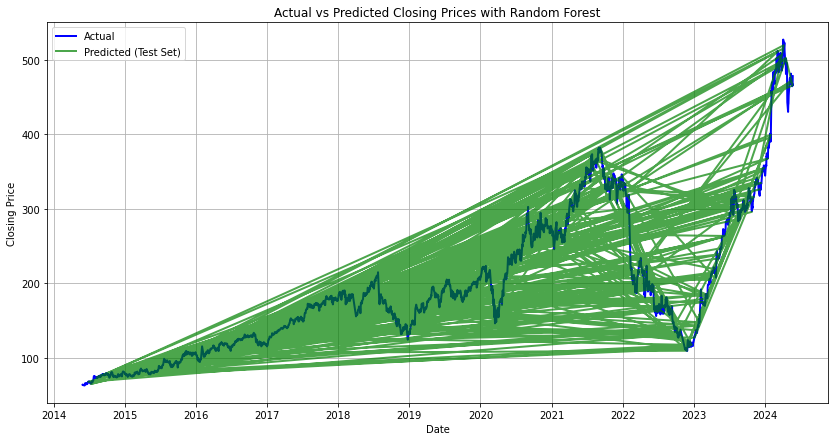

In [12]:
import matplotlib.dates as mdates

# Ensure the 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Create a DataFrame for the test set
test_dates = data.iloc[X_test.index]['Date']

# Plot actual vs predicted values over time for Polynomial Regression
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Actual', linewidth=2, color='blue')
plt.plot(test_dates, y_pred_poly, label='Predicted (Test Set)', linewidth=2, color='orange', alpha=0.7)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend()
plt.title('Actual vs Predicted Closing Prices with Polynomial Features')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

# Plot actual vs predicted values over time for Random Forest
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Actual', linewidth=2, color='blue')
plt.plot(test_dates, y_pred_rf, label='Predicted (Test Set)', linewidth=2, color='green', alpha=0.7)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend()
plt.title('Actual vs Predicted Closing Prices with Random Forest')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


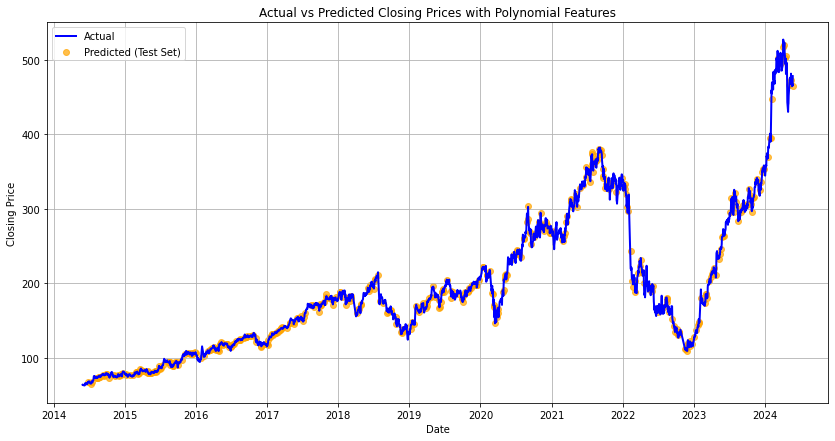

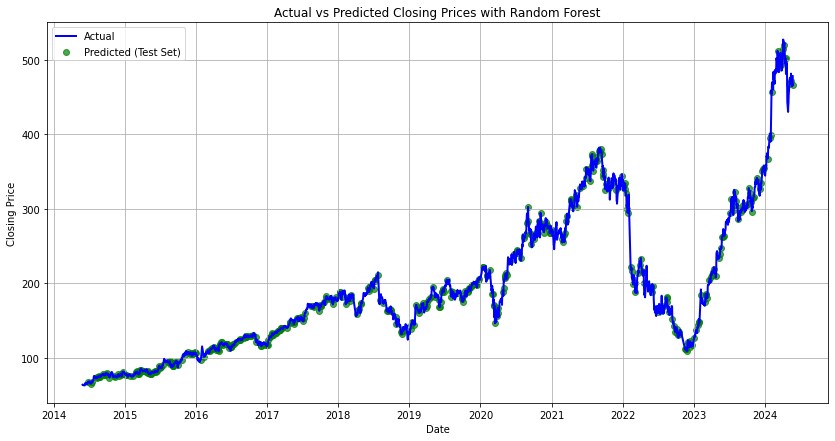

In [13]:
import matplotlib.dates as mdates

# Ensure the 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Create a DataFrame for the test set
test_dates = data.iloc[X_test.index]['Date']

# Plot actual vs predicted values over time for Polynomial Regression
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Actual', linewidth=2, color='blue')
plt.scatter(test_dates, y_pred_poly, label='Predicted (Test Set)', color='orange', alpha=0.7)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend()
plt.title('Actual vs Predicted Closing Prices with Polynomial Features')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

# Plot actual vs predicted values over time for Random Forest
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Actual', linewidth=2, color='blue')
plt.scatter(test_dates, y_pred_rf, label='Predicted (Test Set)', color='green', alpha=0.7)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend()
plt.title('Actual vs Predicted Closing Prices with Random Forest')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


In [14]:
from sklearn.model_selection import cross_val_score

# Polynomial Regression
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Perform 5-fold cross-validation
cv_scores_poly = cross_val_score(model_poly, X_poly, y, cv=5, scoring='neg_mean_squared_error')
print(f"Polynomial Regression - 5-Fold CV Mean Squared Error: {np.mean(-cv_scores_poly)}")

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Random Forest - 5-Fold CV Mean Squared Error: {np.mean(-cv_scores_rf)}")


Polynomial Regression - 5-Fold CV Mean Squared Error: 12.821544008728818
Random Forest - 5-Fold CV Mean Squared Error: 499.88679015290063


In [15]:
from sklearn.metrics import mean_absolute_error

# Polynomial Regression Metrics
mae_poly = mean_absolute_error(y_test, y_pred_poly)
print(f"Polynomial Regression - Mean Absolute Error: {mae_poly}")

# Random Forest Metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest - Mean Absolute Error: {mae_rf}")


Polynomial Regression - Mean Absolute Error: 0.7581753159654009
Random Forest - Mean Absolute Error: 0.2224594065966342


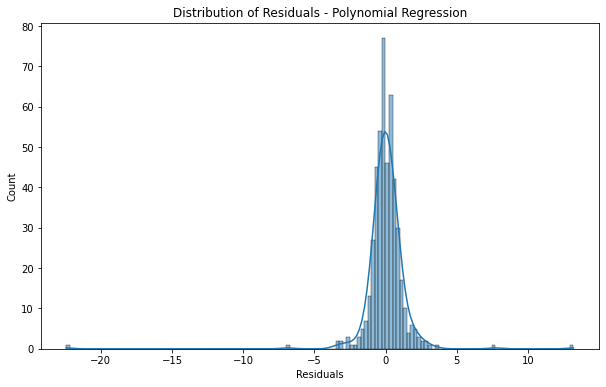

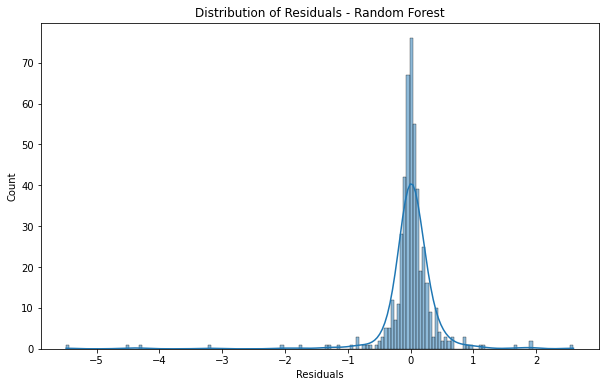

In [16]:
# Residuals for Polynomial Regression
residuals_poly = y_test - y_pred_poly

# Plot residuals distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals_poly, kde=True)
plt.title('Distribution of Residuals - Polynomial Regression')
plt.xlabel('Residuals')
plt.show()

# Residuals for Random Forest
residuals_rf = y_test - y_pred_rf

# Plot residuals distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals_rf, kde=True)
plt.title('Distribution of Residuals - Random Forest')
plt.xlabel('Residuals')
plt.show()


Validation Mean Squared Error: 0.0053320024604886496
Validation R-squared: 0.999999422030283
Test Mean Squared Error: 0.003915766023732735
Test R-squared: 0.9999995422751893


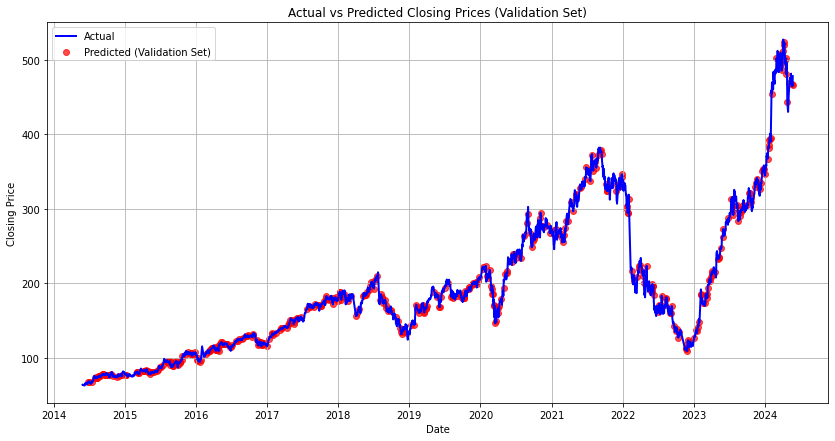

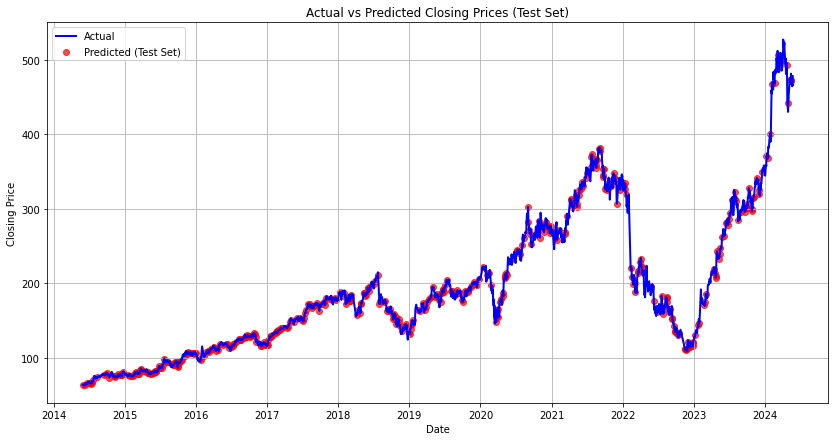

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Load data
data = pd.read_csv('cleaned_merged_meta_data.csv')
data['Date'] = pd.to_datetime(data['Date'])

# Feature selection
selected_features = [
    'Open', 'High', 'Low', 'Adj_Close', 'Volume', 'Daily_Returns',
    'Close_lag_1', 'Close_lag_2', 'Close_lag_3', 'Close_mean_5',
    'Close_std_5', 'Close_SMA_5', 'Close_EMA_5', 'RSI', 'MACD',
    'Bollinger_Bands', 'interest_rate', 'unemployment_rate', 'gdp_growth_rate'
]

target_variable = 'Close'

# Splitting the dataset
X = data[selected_features]
y = data[target_variable]

# Split data into training, validation, and test sets
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Validate the model
y_val_pred = model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)
print(f"Validation Mean Squared Error: {mse_val}")
print(f"Validation R-squared: {r2_val}")

# Test the model
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"Test Mean Squared Error: {mse_test}")
print(f"Test R-squared: {r2_test}")

# Visualize validation results
val_dates = data.iloc[X_val.index]['Date']
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Actual', linewidth=2, color='blue')
plt.scatter(val_dates, y_val_pred, label='Predicted (Validation Set)', color='red', alpha=0.7)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend()
plt.title('Actual vs Predicted Closing Prices (Validation Set)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

# Visualize test results
test_dates = data.iloc[X_test.index]['Date']
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Actual', linewidth=2, color='blue')
plt.scatter(test_dates, y_test_pred, label='Predicted (Test Set)', color='red', alpha=0.7)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend()
plt.title('Actual vs Predicted Closing Prices (Test Set)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


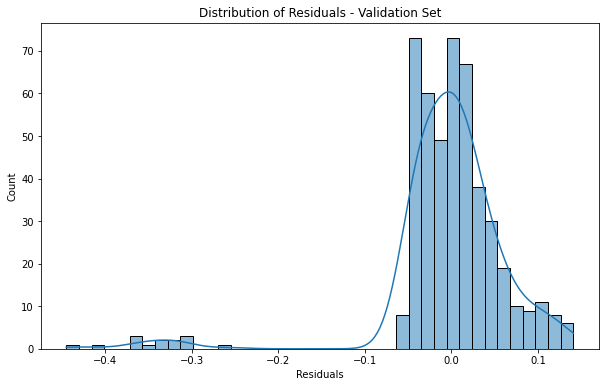

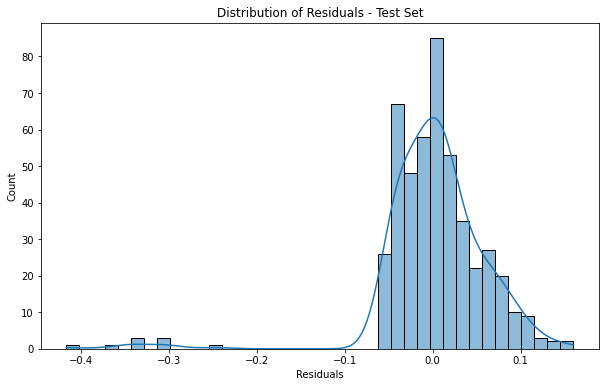

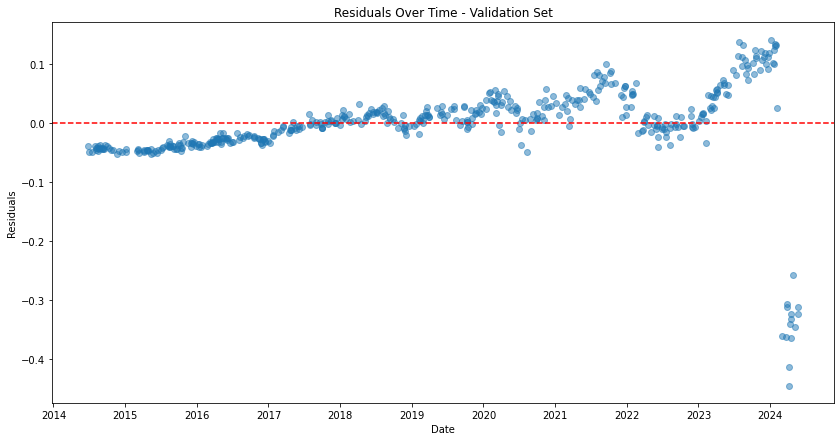

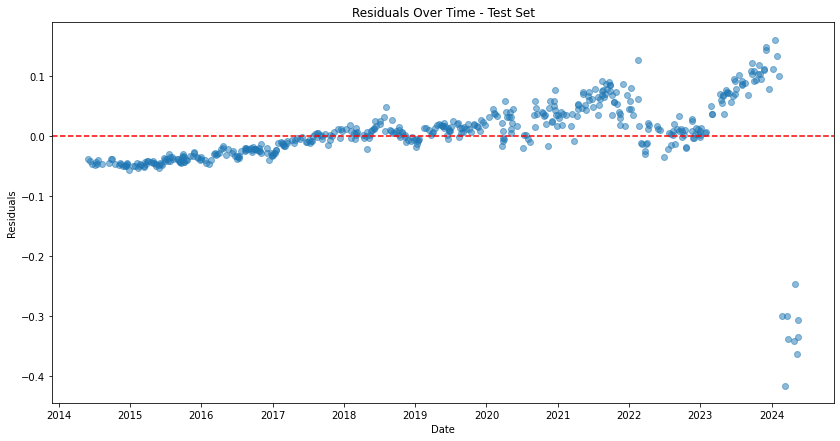

In [19]:
# Calculate residuals
residuals_val = y_val - y_val_pred
residuals_test = y_test - y_test_pred

# Plot residuals distribution for validation set
plt.figure(figsize=(10, 6))
sns.histplot(residuals_val, kde=True)
plt.title('Distribution of Residuals - Validation Set')
plt.xlabel('Residuals')
plt.show()

# Plot residuals distribution for test set
plt.figure(figsize=(10, 6))
sns.histplot(residuals_test, kde=True)
plt.title('Distribution of Residuals - Test Set')
plt.xlabel('Residuals')
plt.show()

# Plot residuals over time for validation set
plt.figure(figsize=(14, 7))
plt.scatter(val_dates, residuals_val, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Over Time - Validation Set')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# Plot residuals over time for test set
plt.figure(figsize=(14, 7))
plt.scatter(test_dates, residuals_test, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Over Time - Test Set')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()


In [20]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_val_pred_ridge = ridge_model.predict(X_val)
mse_val_ridge = mean_squared_error(y_val, y_val_pred_ridge)
r2_val_ridge = r2_score(y_val, y_val_pred_ridge)
print(f"Ridge Validation Mean Squared Error: {mse_val_ridge}")
print(f"Ridge Validation R-squared: {r2_val_ridge}")

# Lasso Regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
y_val_pred_lasso = lasso_model.predict(X_val)
mse_val_lasso = mean_squared_error(y_val, y_val_pred_lasso)
r2_val_lasso = r2_score(y_val, y_val_pred_lasso)
print(f"Lasso Validation Mean Squared Error: {mse_val_lasso}")
print(f"Lasso Validation R-squared: {r2_val_lasso}")

# Compare with Linear Regression
print(f"Linear Regression Validation Mean Squared Error: {mse_val}")
print(f"Linear Regression Validation R-squared: {r2_val}")


Ridge Validation Mean Squared Error: 0.005303357412084319
Ridge Validation R-squared: 0.9999994251353024
Lasso Validation Mean Squared Error: 3.5325617759051027
Lasso Validation R-squared: 0.9996170831231129
Linear Regression Validation Mean Squared Error: 0.0053320024604886496
Linear Regression Validation R-squared: 0.999999422030283


C:\Users\vacha\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.0517e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\vacha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.575e+03, tolerance: 1.329e+03
  model = cd_fast.enet_coordinate_descent(


In [21]:
# Identify outliers
outliers_val = y_val[np.abs(residuals_val) > 0.3]
outliers_test = y_test[np.abs(residuals_test) > 0.3]

# Print outliers
print("Validation Set Outliers:")
print(outliers_val)
print("\nTest Set Outliers:")
print(outliers_test)


Validation Set Outliers:
2341    510.920013
2375    465.779999
2374    467.779999
2336    493.859985
2351    501.799988
2337    485.579987
2343    519.250000
2352    481.070007
2318    502.299988
2346    523.159973
2332    507.760010
2349    499.760010
2363    468.239990
Name: Close, dtype: float64

Test Set Outliers:
2311    468.029999
2334    503.019989
2355    493.500000
2364    472.600006
2370    473.230011
2323    505.950012
2329    496.980011
2368    471.850006
Name: Close, dtype: float64


C:\Users\vacha\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.0517e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge Validation Mean Squared Error: 0.005303357412084319
Ridge Validation R-squared: 0.9999994251353024
Ridge Test Mean Squared Error: 0.003908348561628436
Ridge Test R-squared: 0.999999543142237


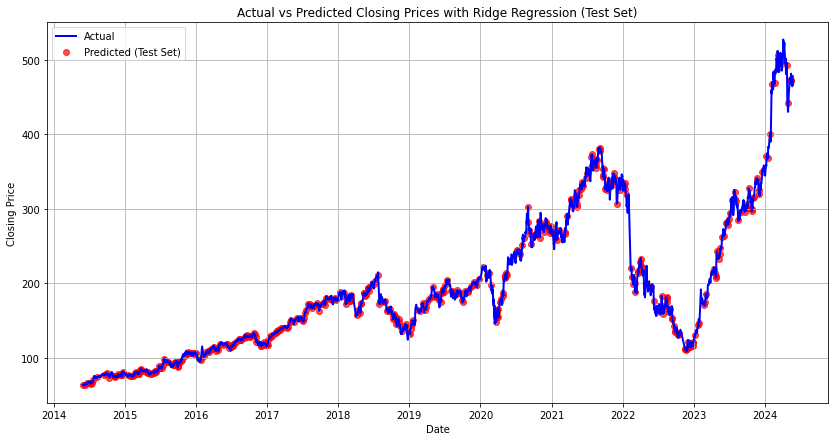

In [23]:
# Train the Ridge Regression model on the entire training set
ridge_model.fit(X_train, y_train)

# Validate the Ridge Regression model
y_val_pred_ridge = ridge_model.predict(X_val)
mse_val_ridge = mean_squared_error(y_val, y_val_pred_ridge)
r2_val_ridge = r2_score(y_val, y_val_pred_ridge)
print(f"Ridge Validation Mean Squared Error: {mse_val_ridge}")
print(f"Ridge Validation R-squared: {r2_val_ridge}")

# Test the Ridge Regression model
y_test_pred_ridge = ridge_model.predict(X_test)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
print(f"Ridge Test Mean Squared Error: {mse_test_ridge}")
print(f"Ridge Test R-squared: {r2_test_ridge}")

# Visualize test results
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Actual', linewidth=2, color='blue')
plt.scatter(test_dates, y_test_pred_ridge, label='Predicted (Test Set)', color='red', alpha=0.7)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend()
plt.title('Actual vs Predicted Closing Prices with Ridge Regression (Test Set)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


In [24]:
# Analyze outliers in validation and test sets
outliers_val_index = residuals_val[abs(residuals_val) > 0.3].index
outliers_test_index = residuals_test[abs(residuals_test) > 0.3].index

# Get outlier data points
outliers_val_data = data.loc[outliers_val_index]
outliers_test_data = data.loc[outliers_test_index]

print("Validation Set Outliers Data:")
print(outliers_val_data)

print("\nTest Set Outliers Data:")
print(outliers_test_data)


Validation Set Outliers Data:
           Date        Open        High         Low       Close   Adj_Close  \
2341 2024-04-04  516.419983  530.000000  510.579987  510.920013  510.920013   
2375 2024-05-23  472.880005  474.359985  461.540009  465.779999  465.779999   
2374 2024-05-22  467.869995  473.720001  465.649994  467.779999  467.779999   
2336 2024-03-27  499.299988  499.890015  488.070007  493.859985  493.859985   
2351 2024-04-18  499.820007  512.210022  499.040009  501.799988  501.799988   
2337 2024-03-28  492.839996  492.890015  485.149994  485.579987  485.579987   
2343 2024-04-08  529.280029  531.489990  518.890015  519.250000  519.250000   
2352 2024-04-19  502.799988  502.799988  475.730011  481.070007  481.070007   
2318 2024-03-01  492.109985  504.250000  491.850006  502.299988  502.299988   
2346 2024-04-11  521.109985  523.859985  517.289978  523.159973  523.159973   
2332 2024-03-21  514.710022  515.039978  506.010010  507.760010  507.760010   
2349 2024-04-16  498.1

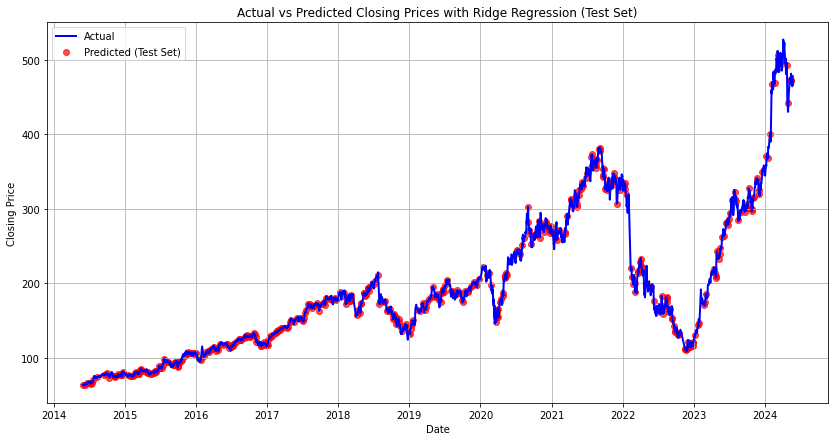

In [26]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Visualize test results
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Actual', linewidth=2, color='blue')
plt.scatter(test_dates, y_test_pred_ridge, label='Predicted (Test Set)', color='red', alpha=0.7)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend()
plt.title('Actual vs Predicted Closing Prices with Ridge Regression (Test Set)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


In [27]:
# Analyze outliers in validation and test sets
outliers_val_index = residuals_val[abs(residuals_val) > 0.3].index
outliers_test_index = residuals_test[abs(residuals_test) > 0.3].index

# Get outlier data points
outliers_val_data = data.loc[outliers_val_index]
outliers_test_data = data.loc[outliers_test_index]

print("Validation Set Outliers Data:")
print(outliers_val_data)

print("\nTest Set Outliers Data:")
print(outliers_test_data)


Validation Set Outliers Data:
           Date        Open        High         Low       Close   Adj_Close  \
2341 2024-04-04  516.419983  530.000000  510.579987  510.920013  510.920013   
2375 2024-05-23  472.880005  474.359985  461.540009  465.779999  465.779999   
2374 2024-05-22  467.869995  473.720001  465.649994  467.779999  467.779999   
2336 2024-03-27  499.299988  499.890015  488.070007  493.859985  493.859985   
2351 2024-04-18  499.820007  512.210022  499.040009  501.799988  501.799988   
2337 2024-03-28  492.839996  492.890015  485.149994  485.579987  485.579987   
2343 2024-04-08  529.280029  531.489990  518.890015  519.250000  519.250000   
2352 2024-04-19  502.799988  502.799988  475.730011  481.070007  481.070007   
2318 2024-03-01  492.109985  504.250000  491.850006  502.299988  502.299988   
2346 2024-04-11  521.109985  523.859985  517.289978  523.159973  523.159973   
2332 2024-03-21  514.710022  515.039978  506.010010  507.760010  507.760010   
2349 2024-04-16  498.1

Ridge Validation MSE (Scaled): 1.1118710596398198
Ridge Validation R-squared (Scaled): 0.9998794772121008
Ridge Test MSE (Scaled): 0.842769993663806
Ridge Test R-squared (Scaled): 0.9999014862651384


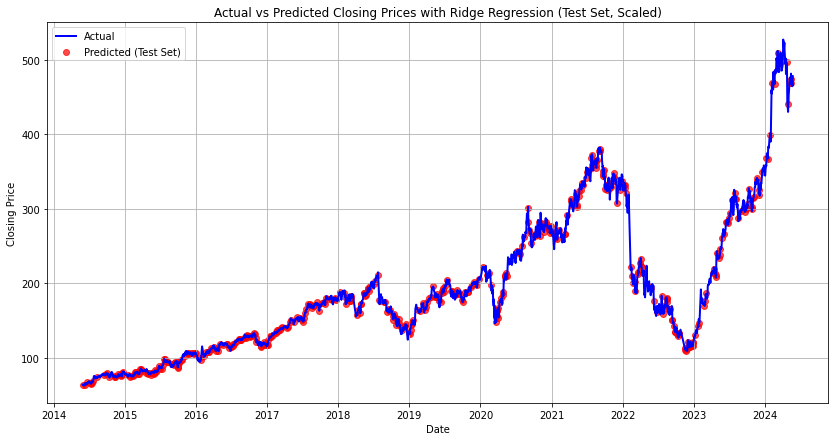

In [29]:
from sklearn.preprocessing import RobustScaler

# Apply robust scaling to features
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train the Ridge Regression model on scaled data
ridge_model_scaled = Ridge(alpha=1.0)
ridge_model_scaled.fit(X_train_scaled, y_train)

# Validate the model on scaled data
y_val_pred_ridge_scaled = ridge_model_scaled.predict(X_val_scaled)
mse_val_ridge_scaled = mean_squared_error(y_val, y_val_pred_ridge_scaled)
r2_val_ridge_scaled = r2_score(y_val, y_val_pred_ridge_scaled)
print(f"Ridge Validation MSE (Scaled): {mse_val_ridge_scaled}")
print(f"Ridge Validation R-squared (Scaled): {r2_val_ridge_scaled}")

# Test the model on scaled data
y_test_pred_ridge_scaled = ridge_model_scaled.predict(X_test_scaled)
mse_test_ridge_scaled = mean_squared_error(y_test, y_test_pred_ridge_scaled)
r2_test_ridge_scaled = r2_score(y_test, y_test_pred_ridge_scaled)
print(f"Ridge Test MSE (Scaled): {mse_test_ridge_scaled}")
print(f"Ridge Test R-squared (Scaled): {r2_test_ridge_scaled}")

# Visualize test results on scaled data
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Actual', linewidth=2, color='blue')
plt.scatter(test_dates, y_test_pred_ridge_scaled, label='Predicted (Test Set)', color='red', alpha=0.7)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend()
plt.title('Actual vs Predicted Closing Prices with Ridge Regression (Test Set, Scaled)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


C:\Users\vacha\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.0517e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge Validation MSE (Log Transformed): 0.015806779938566832
Ridge Validation R-squared (Log Transformed): 0.9294627991459292
Ridge Test MSE (Log Transformed): 0.013657874575806802
Ridge Test R-squared (Log Transformed): 0.9389087433367829


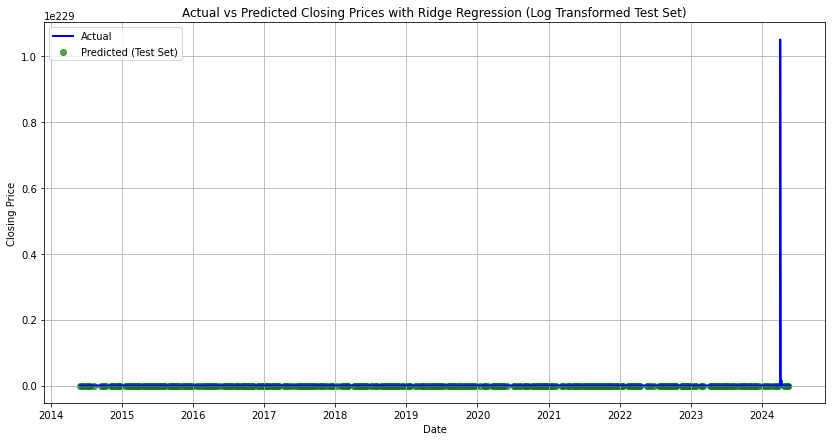

In [30]:
# Apply log transformation to the target variable
y_log = np.log(y + 1)  # Adding 1 to avoid log(0)

# Split data into training, validation, and test sets
X_train_log, X_remaining_log, y_train_log, y_remaining_log = train_test_split(X, y_log, test_size=0.4, random_state=42)
X_val_log, X_test_log, y_val_log, y_test_log = train_test_split(X_remaining_log, y_remaining_log, test_size=0.5, random_state=42)

# Train the Ridge Regression model on the log-transformed data
ridge_model_log = Ridge(alpha=1.0)
ridge_model_log.fit(X_train_log, y_train_log)

# Validate the model on log-transformed data
y_val_pred_log = ridge_model_log.predict(X_val_log)
mse_val_log = mean_squared_error(y_val_log, y_val_pred_log)
r2_val_log = r2_score(y_val_log, y_val_pred_log)
print(f"Ridge Validation MSE (Log Transformed): {mse_val_log}")
print(f"Ridge Validation R-squared (Log Transformed): {r2_val_log}")

# Test the model on log-transformed data
y_test_pred_log = ridge_model_log.predict(X_test_log)
mse_test_log = mean_squared_error(y_test_log, y_test_pred_log)
r2_test_log = r2_score(y_test_log, y_test_pred_log)
print(f"Ridge Test MSE (Log Transformed): {mse_test_log}")
print(f"Ridge Test R-squared (Log Transformed): {r2_test_log}")

# Visualize test results on log-transformed data
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], np.exp(data['Close']) - 1, label='Actual', linewidth=2, color='blue')
plt.scatter(test_dates, np.exp(y_test_pred_log) - 1, label='Predicted (Test Set)', color='green', alpha=0.7)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend()
plt.title('Actual vs Predicted Closing Prices with Ridge Regression (Log Transformed Test Set)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


C:\Users\vacha\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.0517e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge Validation MSE (Log Transformed): 0.015806779938566832
Ridge Validation R-squared (Log Transformed): 0.9294627991459292
Ridge Test MSE (Log Transformed): 0.013657874575806802
Ridge Test R-squared (Log Transformed): 0.9389087433367829


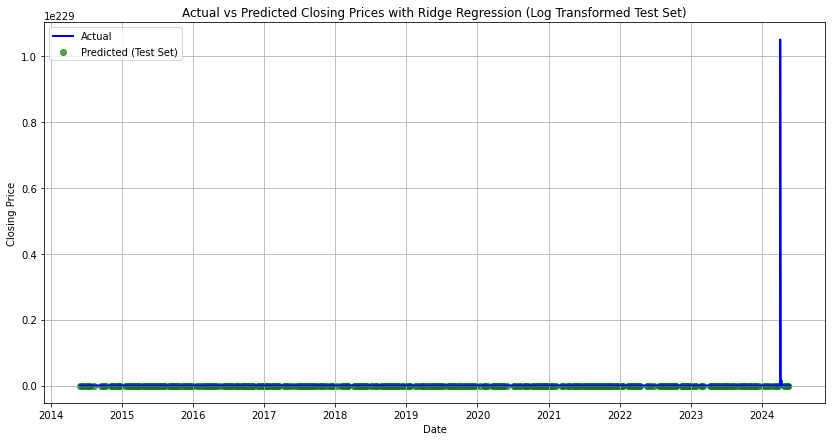

In [31]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Apply log transformation to the target variable
y_log = np.log(y + 1)  # Adding 1 to avoid log(0)

# Split data into training, validation, and test sets
X_train_log, X_remaining_log, y_train_log, y_remaining_log = train_test_split(X, y_log, test_size=0.4, random_state=42)
X_val_log, X_test_log, y_val_log, y_test_log = train_test_split(X_remaining_log, y_remaining_log, test_size=0.5, random_state=42)

# Train the Ridge Regression model on the log-transformed data
ridge_model_log = Ridge(alpha=1.0)
ridge_model_log.fit(X_train_log, y_train_log)

# Validate the model on log-transformed data
y_val_pred_log = ridge_model_log.predict(X_val_log)
mse_val_log = mean_squared_error(y_val_log, y_val_pred_log)
r2_val_log = r2_score(y_val_log, y_val_pred_log)
print(f"Ridge Validation MSE (Log Transformed): {mse_val_log}")
print(f"Ridge Validation R-squared (Log Transformed): {r2_val_log}")

# Test the model on log-transformed data
y_test_pred_log = ridge_model_log.predict(X_test_log)
mse_test_log = mean_squared_error(y_test_log, y_test_pred_log)
r2_test_log = r2_score(y_test_log, y_test_pred_log)
print(f"Ridge Test MSE (Log Transformed): {mse_test_log}")
print(f"Ridge Test R-squared (Log Transformed): {r2_test_log}")

# Visualize test results on log-transformed data
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], np.exp(data['Close']) - 1, label='Actual', linewidth=2, color='blue')
plt.scatter(test_dates, np.exp(y_test_pred_log) - 1, label='Predicted (Test Set)', color='green', alpha=0.7)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend()
plt.title('Actual vs Predicted Closing Prices with Ridge Regression (Log Transformed Test Set)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


Huber Validation MSE: 17834.09110854134
Huber Validation R-squared: -0.9331507564796024
Huber Test MSE: 17096.505975426633
Huber Test R-squared: -0.9984582619041904


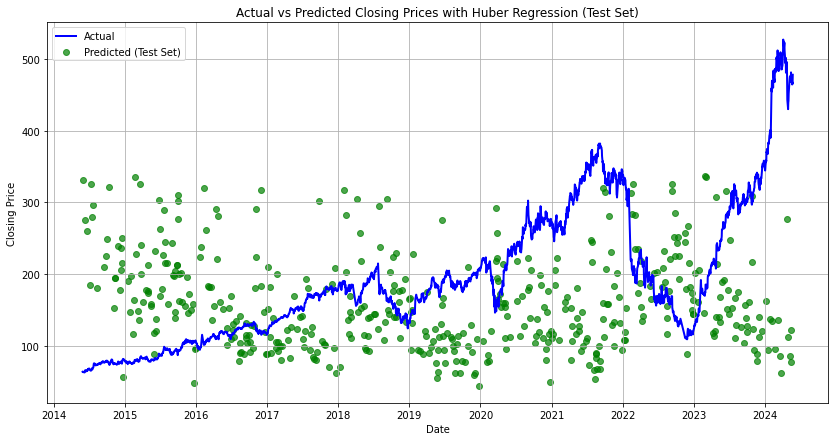

In [32]:
from sklearn.linear_model import HuberRegressor

# Train the Huber Regressor model
huber_model = HuberRegressor()
huber_model.fit(X_train, y_train)

# Validate the model
y_val_pred_huber = huber_model.predict(X_val)
mse_val_huber = mean_squared_error(y_val, y_val_pred_huber)
r2_val_huber = r2_score(y_val, y_val_pred_huber)
print(f"Huber Validation MSE: {mse_val_huber}")
print(f"Huber Validation R-squared: {r2_val_huber}")

# Test the model
y_test_pred_huber = huber_model.predict(X_test)
mse_test_huber = mean_squared_error(y_test, y_test_pred_huber)
r2_test_huber = r2_score(y_test, y_test_pred_huber)
print(f"Huber Test MSE: {mse_test_huber}")
print(f"Huber Test R-squared: {r2_test_huber}")

# Visualize test results
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Actual', linewidth=2, color='blue')
plt.scatter(test_dates, y_test_pred_huber, label='Predicted (Test Set)', color='green', alpha=0.7)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend()
plt.title('Actual vs Predicted Closing Prices with Huber Regression (Test Set)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)


Best parameters found: {'alpha': 1000.0}
Best Ridge Validation MSE: 0.01575536284039165
Best Ridge Validation R-squared: 0.929692246142434
Best Ridge Test MSE: 0.013588732791260601
Best Ridge Test R-squared: 0.9392180124315033


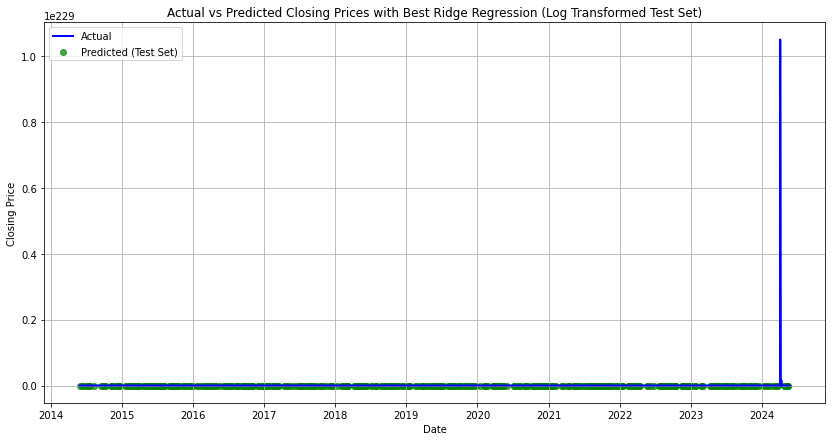

In [33]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]}

# Initialize the Ridge Regression model
ridge_model = Ridge()

# Perform Grid Search
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_log, y_train_log)

# Best parameters
print(f"Best parameters found: {grid_search.best_params_}")

# Best estimator
best_ridge_model = grid_search.best_estimator_

# Validate the model with the best parameters
y_val_pred_best_ridge = best_ridge_model.predict(X_val_log)
mse_val_best_ridge = mean_squared_error(y_val_log, y_val_pred_best_ridge)
r2_val_best_ridge = r2_score(y_val_log, y_val_pred_best_ridge)
print(f"Best Ridge Validation MSE: {mse_val_best_ridge}")
print(f"Best Ridge Validation R-squared: {r2_val_best_ridge}")

# Test the model with the best parameters
y_test_pred_best_ridge = best_ridge_model.predict(X_test_log)
mse_test_best_ridge = mean_squared_error(y_test_log, y_test_pred_best_ridge)
r2_test_best_ridge = r2_score(y_test_log, y_test_pred_best_ridge)
print(f"Best Ridge Test MSE: {mse_test_best_ridge}")
print(f"Best Ridge Test R-squared: {r2_test_best_ridge}")

# Visualize test results
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], np.exp(data['Close']) - 1, label='Actual', linewidth=2, color='blue')
plt.scatter(test_dates, np.exp(y_test_pred_best_ridge) - 1, label='Predicted (Test Set)', color='green', alpha=0.7)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend()
plt.title('Actual vs Predicted Closing Prices with Best Ridge Regression (Log Transformed Test Set)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


C:\Users\vacha\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.0517e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ensemble Validation MSE: 0.007050387235298851
Ensemble Validation R-squared: 0.9685378943435621
Ensemble Test MSE: 0.006077421107613137
Ensemble Test R-squared: 0.9728158806353868


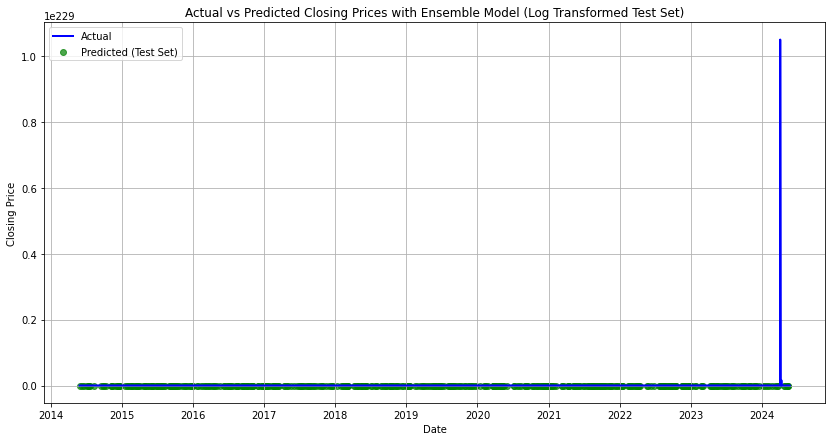

In [34]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Initialize the base models
ridge_model = Ridge(alpha=1.0)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
linear_model = LinearRegression()

# Create the ensemble model
ensemble_model = VotingRegressor(estimators=[
    ('ridge', ridge_model),
    ('rf', rf_model),
    ('linear', linear_model)
])

# Train the ensemble model on the log-transformed data
ensemble_model.fit(X_train_log, y_train_log)

# Validate the ensemble model
y_val_pred_ensemble = ensemble_model.predict(X_val_log)
mse_val_ensemble = mean_squared_error(y_val_log, y_val_pred_ensemble)
r2_val_ensemble = r2_score(y_val_log, y_val_pred_ensemble)
print(f"Ensemble Validation MSE: {mse_val_ensemble}")
print(f"Ensemble Validation R-squared: {r2_val_ensemble}")

# Test the ensemble model
y_test_pred_ensemble = ensemble_model.predict(X_test_log)
mse_test_ensemble = mean_squared_error(y_test_log, y_test_pred_ensemble)
r2_test_ensemble = r2_score(y_test_log, y_test_pred_ensemble)
print(f"Ensemble Test MSE: {mse_test_ensemble}")
print(f"Ensemble Test R-squared: {r2_test_ensemble}")

# Visualize test results
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], np.exp(data['Close']) - 1, label='Actual', linewidth=2, color='blue')
plt.scatter(test_dates, np.exp(y_test_pred_ensemble) - 1, label='Predicted (Test Set)', color='green', alpha=0.7)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend()
plt.title('Actual vs Predicted Closing Prices with Ensemble Model (Log Transformed Test Set)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


Best Ridge Validation MSE: 2092.7999834514085
Best Ridge Validation R-squared: 0.7731480765379757
Best Ridge Test MSE: 1203.894536788907
Best Ridge Test R-squared: 0.8592734101947359


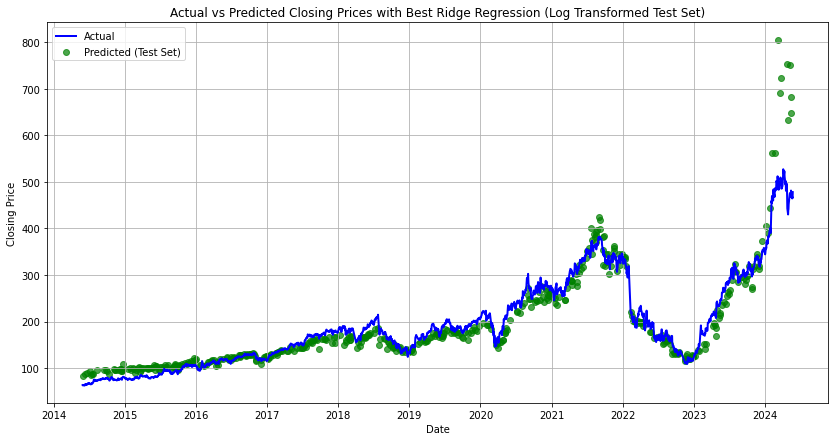

Ensemble Validation MSE: 849.5816098814362
Ensemble Validation R-squared: 0.907908436609541
Ensemble Test MSE: 495.04258225216824
Ensemble Test R-squared: 0.9421330919944569


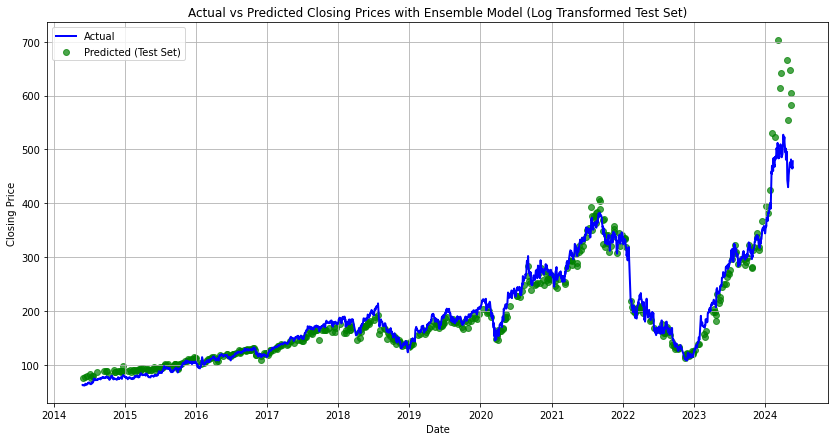

In [35]:
import numpy as np
import matplotlib.dates as mdates
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import VotingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Apply log transformation to the target variable
y_log = np.log1p(y)  # log1p is log(1 + y), which avoids issues with log(0)

# Split data into training, validation, and test sets
X_train_log, X_remaining_log, y_train_log, y_remaining_log = train_test_split(X, y_log, test_size=0.4, random_state=42)
X_val_log, X_test_log, y_val_log, y_test_log = train_test_split(X_remaining_log, y_remaining_log, test_size=0.5, random_state=42)

# Define the parameter grid for Ridge Regression
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]}

# Initialize the Ridge Regression model
ridge_model = Ridge()

# Perform Grid Search
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_log, y_train_log)

# Best parameters
best_ridge_model = grid_search.best_estimator_

# Validate the model with the best parameters
y_val_pred_best_ridge = best_ridge_model.predict(X_val_log)
mse_val_best_ridge = mean_squared_error(np.expm1(y_val_log), np.expm1(y_val_pred_best_ridge))
r2_val_best_ridge = r2_score(np.expm1(y_val_log), np.expm1(y_val_pred_best_ridge))
print(f"Best Ridge Validation MSE: {mse_val_best_ridge}")
print(f"Best Ridge Validation R-squared: {r2_val_best_ridge}")

# Test the model with the best parameters
y_test_pred_best_ridge = best_ridge_model.predict(X_test_log)
mse_test_best_ridge = mean_squared_error(np.expm1(y_test_log), np.expm1(y_test_pred_best_ridge))
r2_test_best_ridge = r2_score(np.expm1(y_test_log), np.expm1(y_test_pred_best_ridge))
print(f"Best Ridge Test MSE: {mse_test_best_ridge}")
print(f"Best Ridge Test R-squared: {r2_test_best_ridge}")

# Visualize test results
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Actual', linewidth=2, color='blue')
plt.scatter(test_dates, np.expm1(y_test_pred_best_ridge), label='Predicted (Test Set)', color='green', alpha=0.7)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend()
plt.title('Actual vs Predicted Closing Prices with Best Ridge Regression (Log Transformed Test Set)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

# Ensemble Model
# Initialize the base models
ridge_model = Ridge(alpha=grid_search.best_params_['alpha'])
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
linear_model = LinearRegression()

# Create the ensemble model
ensemble_model = VotingRegressor(estimators=[
    ('ridge', ridge_model),
    ('rf', rf_model),
    ('linear', linear_model)
])

# Train the ensemble model on the log-transformed data
ensemble_model.fit(X_train_log, y_train_log)

# Validate the ensemble model
y_val_pred_ensemble = ensemble_model.predict(X_val_log)
mse_val_ensemble = mean_squared_error(np.expm1(y_val_log), np.expm1(y_val_pred_ensemble))
r2_val_ensemble = r2_score(np.expm1(y_val_log), np.expm1(y_val_pred_ensemble))
print(f"Ensemble Validation MSE: {mse_val_ensemble}")
print(f"Ensemble Validation R-squared: {r2_val_ensemble}")

# Test the ensemble model
y_test_pred_ensemble = ensemble_model.predict(X_test_log)
mse_test_ensemble = mean_squared_error(np.expm1(y_test_log), np.expm1(y_test_pred_ensemble))
r2_test_ensemble = r2_score(np.expm1(y_test_log), np.expm1(y_test_pred_ensemble))
print(f"Ensemble Test MSE: {mse_test_ensemble}")
print(f"Ensemble Test R-squared: {r2_test_ensemble}")

# Visualize test results
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Actual', linewidth=2, color='blue')
plt.scatter(test_dates, np.expm1(y_test_pred_ensemble), label='Predicted (Test Set)', color='green', alpha=0.7)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend()
plt.title('Actual vs Predicted Closing Prices with Ensemble Model (Log Transformed Test Set)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


Ensemble Validation MSE: 849.7802947477419
Ensemble Validation R-squared: 0.9078868998910582
Ensemble Test MSE: 493.45635294766345
Ensemble Test R-squared: 0.942318510761509


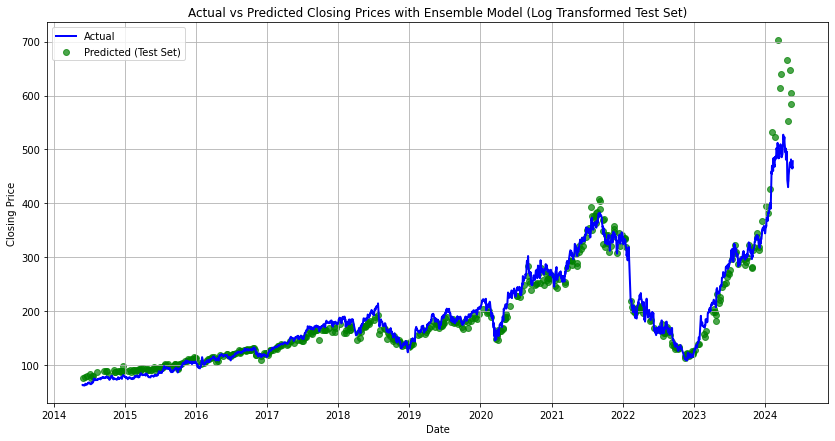

In [36]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Perform Randomized Search
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid_rf, n_iter=50, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
random_search_rf.fit(X_train_log, y_train_log)

# Best parameters for Random Forest
best_rf_model = random_search_rf.best_estimator_

# Ensemble Model with best Random Forest
ensemble_model = VotingRegressor(estimators=[
    ('ridge', Ridge(alpha=1000.0)),  # Using previously found best alpha
    ('rf', best_rf_model),
    ('linear', LinearRegression())
])

# Train the ensemble model on the log-transformed data
ensemble_model.fit(X_train_log, y_train_log)

# Validate the ensemble model
y_val_pred_ensemble = ensemble_model.predict(X_val_log)
mse_val_ensemble = mean_squared_error(np.expm1(y_val_log), np.expm1(y_val_pred_ensemble))
r2_val_ensemble = r2_score(np.expm1(y_val_log), np.expm1(y_val_pred_ensemble))
print(f"Ensemble Validation MSE: {mse_val_ensemble}")
print(f"Ensemble Validation R-squared: {r2_val_ensemble}")

# Test the ensemble model
y_test_pred_ensemble = ensemble_model.predict(X_test_log)
mse_test_ensemble = mean_squared_error(np.expm1(y_test_log), np.expm1(y_test_pred_ensemble))
r2_test_ensemble = r2_score(np.expm1(y_test_log), np.expm1(y_test_pred_ensemble))
print(f"Ensemble Test MSE: {mse_test_ensemble}")
print(f"Ensemble Test R-squared: {r2_test_ensemble}")

# Visualize test results
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Actual', linewidth=2, color='blue')
plt.scatter(test_dates, np.expm1(y_test_pred_ensemble), label='Predicted (Test Set)', color='green', alpha=0.7)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend()
plt.title('Actual vs Predicted Closing Prices with Ensemble Model (Log Transformed Test Set)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


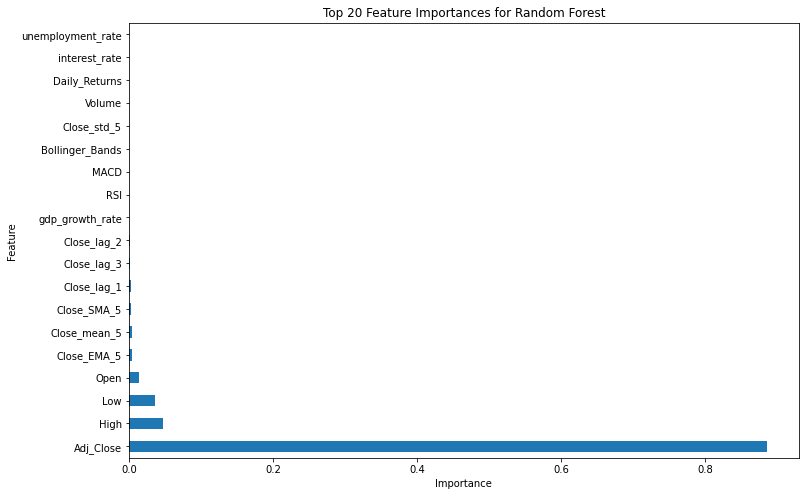

In [37]:
# Feature importance for the Random Forest component
importances = best_rf_model.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names)

# Plotting the feature importances
plt.figure(figsize=(12, 8))
forest_importances.nlargest(20).plot(kind='barh')
plt.title('Top 20 Feature Importances for Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [38]:
from sklearn.model_selection import cross_val_score

# Cross-validation for the ensemble model
cv_scores = cross_val_score(ensemble_model, X, y_log, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Convert negative MSE to positive
cv_mse = -cv_scores

print(f"Cross-Validation MSE: {cv_mse.mean()}")
print(f"Cross-Validation Standard Deviation: {cv_mse.std()}")


Cross-Validation MSE: 0.05557794159777808
Cross-Validation Standard Deviation: 0.03411634049209644


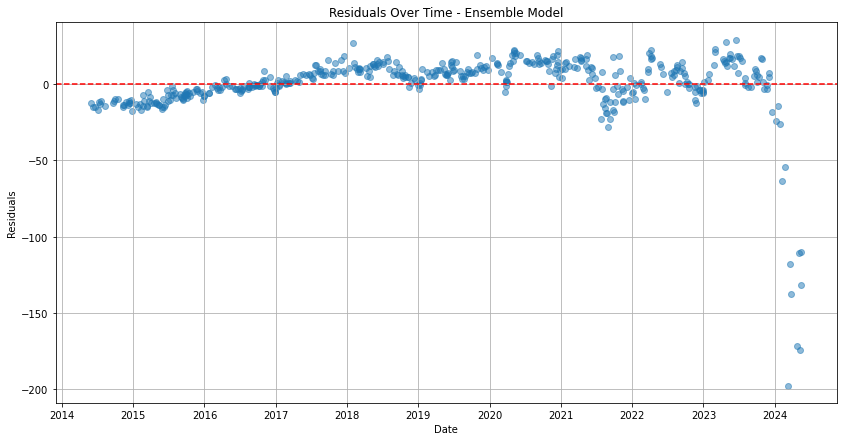

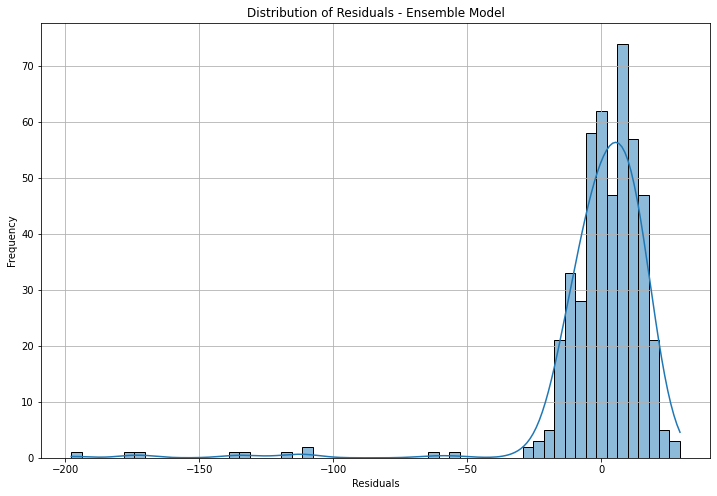

In [39]:
# Residuals for the ensemble model
residuals = np.expm1(y_test_log) - np.expm1(y_test_pred_ensemble)

# Residual plot
plt.figure(figsize=(14, 7))
plt.scatter(test_dates, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Over Time - Ensemble Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Residuals distribution
plt.figure(figsize=(12, 8))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals - Ensemble Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [40]:
# Identify outliers
outliers_index = residuals[abs(residuals) > 50].index

# Get outlier data points
outliers_data = data.loc[outliers_index]

print("Outliers Data:")
print(outliers_data)


Outliers Data:
           Date        Open        High         Low       Close   Adj_Close  \
2311 2024-02-21  466.500000  469.000000  461.790009  468.029999  468.029999   
2334 2024-03-25  505.790009  507.220001  500.239990  503.019989  503.019989   
2304 2024-02-09  472.950012  473.589996  467.470001  468.109985  467.613831   
2355 2024-04-24  508.059998  510.000000  484.579987  493.500000  493.500000   
2364 2024-05-08  463.500000  475.579987  463.000000  472.600006  472.600006   
2370 2024-05-16  475.000000  477.690002  472.750000  473.230011  473.230011   
2323 2024-03-08  514.190002  523.570007  499.350006  505.950012  505.950012   
2329 2024-03-18  491.910004  497.420013  486.809998  496.980011  496.980011   
2360 2024-05-02  438.839996  443.959991  432.279999  441.679993  441.679993   
2368 2024-05-14  463.369995  472.540009  460.079987  471.850006  471.850006   

        Volume  Daily_Returns  Moving_Average  Rolling_Std  ...  \
2311  12977100      -0.007886      470.712997   

Ensemble Validation MSE with Temporal Features: 340.7017349027829
Ensemble Validation R-squared with Temporal Features: 0.9630691683387336
Ensemble Test MSE with Temporal Features: 202.6218268110173
Ensemble Test R-squared with Temporal Features: 0.9763149695958567


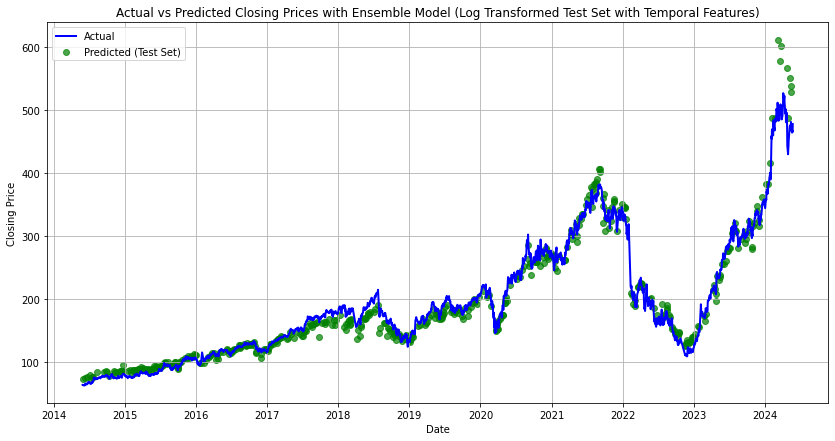

In [41]:
# Add temporal features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Update feature set
selected_features = [
    'Open', 'High', 'Low', 'Adj_Close', 'Volume', 'Daily_Returns',
    'Close_lag_1', 'Close_lag_2', 'Close_lag_3', 'Close_mean_5',
    'Close_std_5', 'Close_SMA_5', 'Close_EMA_5', 'RSI', 'MACD',
    'Bollinger_Bands', 'interest_rate', 'unemployment_rate', 'gdp_growth_rate',
    'Year', 'Month'
]

# Prepare data
X = data[selected_features]
y = data['Close']

# Apply log transformation to the target variable
y_log = np.log1p(y)

# Split data into training, validation, and test sets
X_train_log, X_remaining_log, y_train_log, y_remaining_log = train_test_split(X, y_log, test_size=0.4, random_state=42)
X_val_log, X_test_log, y_val_log, y_test_log = train_test_split(X_remaining_log, y_remaining_log, test_size=0.5, random_state=42)

# Train and evaluate the ensemble model
ensemble_model.fit(X_train_log, y_train_log)

# Validate the ensemble model
y_val_pred_ensemble = ensemble_model.predict(X_val_log)
mse_val_ensemble = mean_squared_error(np.expm1(y_val_log), np.expm1(y_val_pred_ensemble))
r2_val_ensemble = r2_score(np.expm1(y_val_log), np.expm1(y_val_pred_ensemble))
print(f"Ensemble Validation MSE with Temporal Features: {mse_val_ensemble}")
print(f"Ensemble Validation R-squared with Temporal Features: {r2_val_ensemble}")

# Test the ensemble model
y_test_pred_ensemble = ensemble_model.predict(X_test_log)
mse_test_ensemble = mean_squared_error(np.expm1(y_test_log), np.expm1(y_test_pred_ensemble))
r2_test_ensemble = r2_score(np.expm1(y_test_log), np.expm1(y_test_pred_ensemble))
print(f"Ensemble Test MSE with Temporal Features: {mse_test_ensemble}")
print(f"Ensemble Test R-squared with Temporal Features: {r2_test_ensemble}")

# Visualize test results
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Actual', linewidth=2, color='blue')
plt.scatter(test_dates, np.expm1(y_test_pred_ensemble), label='Predicted (Test Set)', color='green', alpha=0.7)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend()
plt.title('Actual vs Predicted Closing Prices with Ensemble Model (Log Transformed Test Set with Temporal Features)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


Ensemble Validation MSE with Robust Scaling: 257.6823569884867
Ensemble Validation R-squared with Robust Scaling: 0.9720681676283932
Ensemble Test MSE with Robust Scaling: 170.0998352211389
Ensemble Test R-squared with Robust Scaling: 0.9801165558895584


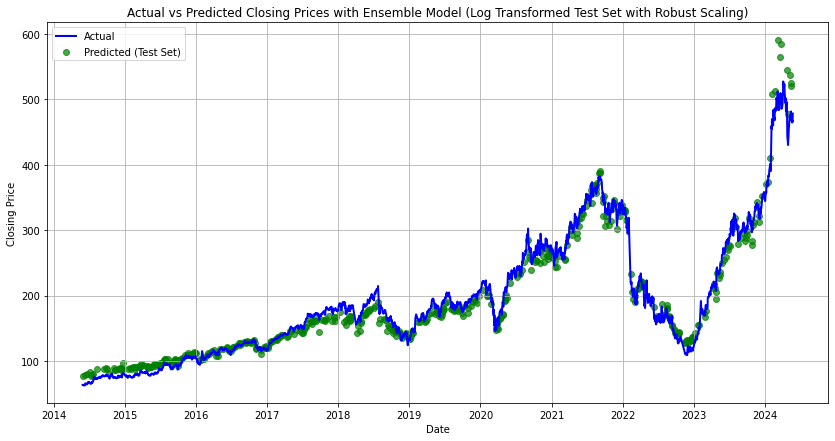

In [42]:
from sklearn.preprocessing import RobustScaler

# Apply robust scaling to features
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Split scaled data into training, validation, and test sets
X_train_scaled, X_remaining_scaled, y_train_log, y_remaining_log = train_test_split(X_scaled, y_log, test_size=0.4, random_state=42)
X_val_scaled, X_test_scaled, y_val_log, y_test_log = train_test_split(X_remaining_scaled, y_remaining_log, test_size=0.5, random_state=42)

# Train the ensemble model on scaled data
ensemble_model.fit(X_train_scaled, y_train_log)

# Validate the ensemble model
y_val_pred_ensemble = ensemble_model.predict(X_val_scaled)
mse_val_ensemble = mean_squared_error(np.expm1(y_val_log), np.expm1(y_val_pred_ensemble))
r2_val_ensemble = r2_score(np.expm1(y_val_log), np.expm1(y_val_pred_ensemble))
print(f"Ensemble Validation MSE with Robust Scaling: {mse_val_ensemble}")
print(f"Ensemble Validation R-squared with Robust Scaling: {r2_val_ensemble}")

# Test the ensemble model
y_test_pred_ensemble = ensemble_model.predict(X_test_scaled)
mse_test_ensemble = mean_squared_error(np.expm1(y_test_log), np.expm1(y_test_pred_ensemble))
r2_test_ensemble = r2_score(np.expm1(y_test_log), np.expm1(y_test_pred_ensemble))
print(f"Ensemble Test MSE with Robust Scaling: {mse_test_ensemble}")
print(f"Ensemble Test R-squared with Robust Scaling: {r2_test_ensemble}")

# Visualize test results
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Actual', linewidth=2, color='blue')
plt.scatter(test_dates, np.expm1(y_test_pred_ensemble), label='Predicted (Test Set)', color='green', alpha=0.7)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend()
plt.title('Actual vs Predicted Closing Prices with Ensemble Model (Log Transformed Test Set with Robust Scaling)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


In [43]:
from sklearn.model_selection import cross_val_score

# Cross-validation for the ensemble model with robust scaling
cv_scores = cross_val_score(ensemble_model, X_scaled, y_log, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Convert negative MSE to positive
cv_mse = -cv_scores

print(f"Cross-Validation MSE: {cv_mse.mean()}")
print(f"Cross-Validation Standard Deviation: {cv_mse.std()}")


Cross-Validation MSE: 0.03693775297673049
Cross-Validation Standard Deviation: 0.034267437023166224


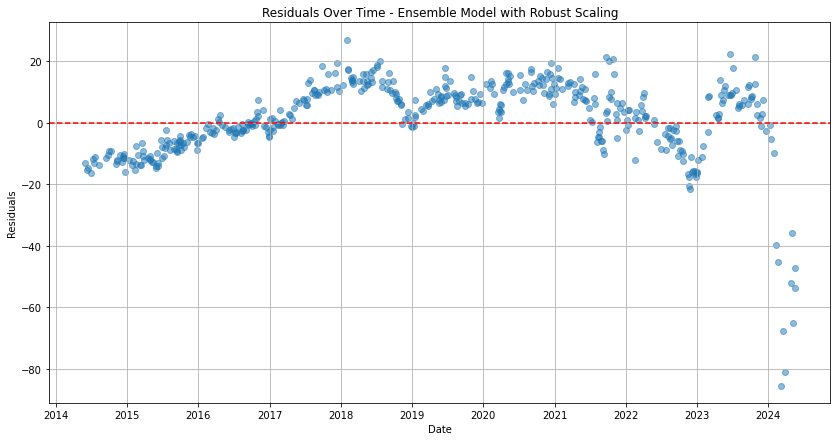

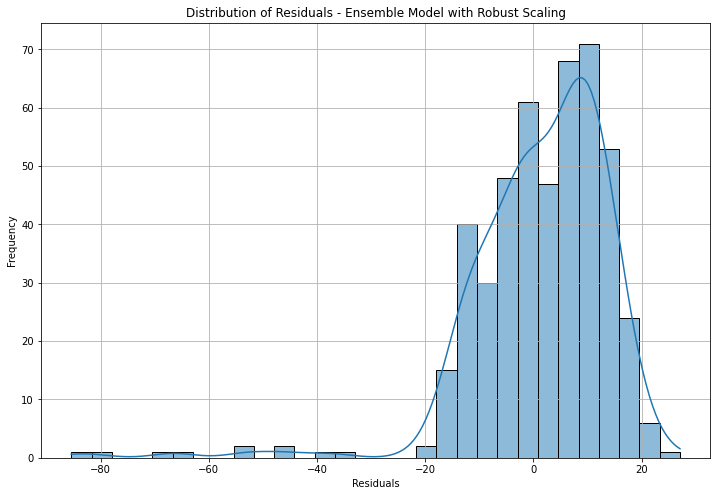

In [44]:
# Residuals for the ensemble model with robust scaling
residuals = np.expm1(y_test_log) - np.expm1(y_test_pred_ensemble)

# Residual plot
plt.figure(figsize=(14, 7))
plt.scatter(test_dates, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Over Time - Ensemble Model with Robust Scaling')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Residuals distribution
plt.figure(figsize=(12, 8))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals - Ensemble Model with Robust Scaling')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Ensemble Validation MSE after Outlier Handling: 257.6823569884867
Ensemble Validation R-squared after Outlier Handling: 0.9720681676283932
Ensemble Test MSE after Outlier Handling: 2987.955811948279
Ensemble Test R-squared after Outlier Handling: 0.5445354937584584


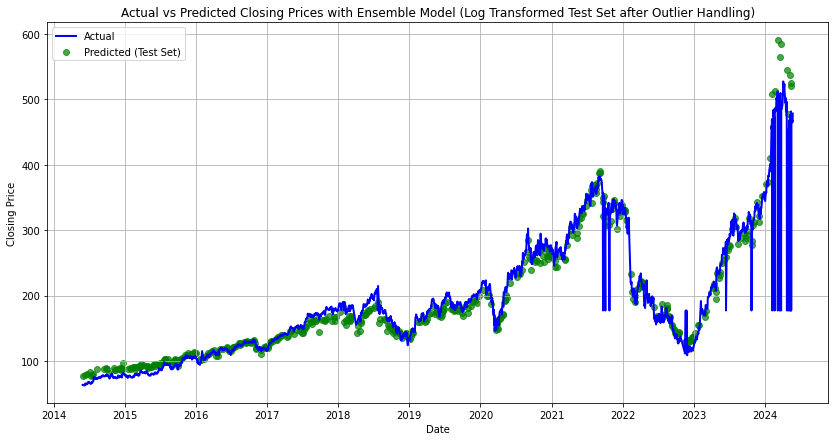

In [45]:
# Identify outliers
threshold = 20
outliers_index = residuals[abs(residuals) > threshold].index

# Replace outliers with median of non-outlier data
median_value = data['Close'].loc[~data.index.isin(outliers_index)].median()
data.loc[outliers_index, 'Close'] = median_value

# Prepare data with outlier handling
X = data[selected_features]
y = data['Close']

# Apply log transformation to the target variable
y_log = np.log1p(y)

# Apply robust scaling to features
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Split scaled data into training, validation, and test sets
X_train_scaled, X_remaining_scaled, y_train_log, y_remaining_log = train_test_split(X_scaled, y_log, test_size=0.4, random_state=42)
X_val_scaled, X_test_scaled, y_val_log, y_test_log = train_test_split(X_remaining_scaled, y_remaining_log, test_size=0.5, random_state=42)

# Train the ensemble model on scaled data
ensemble_model.fit(X_train_scaled, y_train_log)

# Validate the ensemble model
y_val_pred_ensemble = ensemble_model.predict(X_val_scaled)
mse_val_ensemble = mean_squared_error(np.expm1(y_val_log), np.expm1(y_val_pred_ensemble))
r2_val_ensemble = r2_score(np.expm1(y_val_log), np.expm1(y_val_pred_ensemble))
print(f"Ensemble Validation MSE after Outlier Handling: {mse_val_ensemble}")
print(f"Ensemble Validation R-squared after Outlier Handling: {r2_val_ensemble}")

# Test the ensemble model
y_test_pred_ensemble = ensemble_model.predict(X_test_scaled)
mse_test_ensemble = mean_squared_error(np.expm1(y_test_log), np.expm1(y_test_pred_ensemble))
r2_test_ensemble = r2_score(np.expm1(y_test_log), np.expm1(y_test_pred_ensemble))
print(f"Ensemble Test MSE after Outlier Handling: {mse_test_ensemble}")
print(f"Ensemble Test R-squared after Outlier Handling: {r2_test_ensemble}")

# Visualize test results
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Actual', linewidth=2, color='blue')
plt.scatter(test_dates, np.expm1(y_test_pred_ensemble), label='Predicted (Test Set)', color='green', alpha=0.7)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend()
plt.title('Actual vs Predicted Closing Prices with Ensemble Model (Log Transformed Test Set after Outlier Handling)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


Ensemble Validation MSE without Outliers: 176.89884246103966
Ensemble Validation R-squared without Outliers: 0.9781287558562595
Ensemble Test MSE without Outliers: 231.58851846581007
Ensemble Test R-squared without Outliers: 0.9735368180896906


ValueError: x and y must be the same size

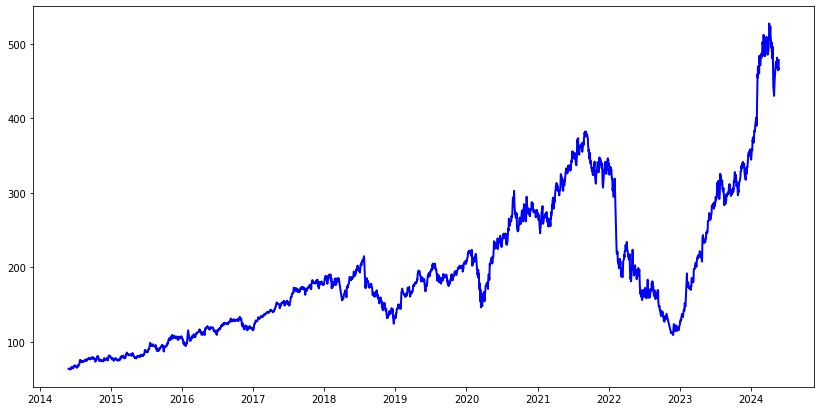

In [46]:
import numpy as np
import matplotlib.dates as mdates
from sklearn.linear_model import Ridge
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler

# Identifying outliers based on residuals
threshold = 20
outliers_index = residuals[abs(residuals) > threshold].index

# Removing the outliers
data_no_outliers = data.drop(outliers_index)

# Prepare data without outliers
X_no_outliers = data_no_outliers[selected_features]
y_no_outliers = data_no_outliers['Close']

# Apply log transformation to the target variable
y_log_no_outliers = np.log1p(y_no_outliers)

# Apply robust scaling to features
scaler = RobustScaler()
X_scaled_no_outliers = scaler.fit_transform(X_no_outliers)

# Split scaled data into training, validation, and test sets
X_train_no_outliers, X_remaining_no_outliers, y_train_log_no_outliers, y_remaining_log_no_outliers = train_test_split(X_scaled_no_outliers, y_log_no_outliers, test_size=0.4, random_state=42)
X_val_no_outliers, X_test_no_outliers, y_val_log_no_outliers, y_test_log_no_outliers = train_test_split(X_remaining_no_outliers, y_remaining_log_no_outliers, test_size=0.5, random_state=42)

# Train the ensemble model on scaled data without outliers
ensemble_model.fit(X_train_no_outliers, y_train_log_no_outliers)

# Validate the ensemble model
y_val_pred_ensemble_no_outliers = ensemble_model.predict(X_val_no_outliers)
mse_val_ensemble_no_outliers = mean_squared_error(np.expm1(y_val_log_no_outliers), np.expm1(y_val_pred_ensemble_no_outliers))
r2_val_ensemble_no_outliers = r2_score(np.expm1(y_val_log_no_outliers), np.expm1(y_val_pred_ensemble_no_outliers))
print(f"Ensemble Validation MSE without Outliers: {mse_val_ensemble_no_outliers}")
print(f"Ensemble Validation R-squared without Outliers: {r2_val_ensemble_no_outliers}")

# Test the ensemble model
y_test_pred_ensemble_no_outliers = ensemble_model.predict(X_test_no_outliers)
mse_test_ensemble_no_outliers = mean_squared_error(np.expm1(y_test_log_no_outliers), np.expm1(y_test_pred_ensemble_no_outliers))
r2_test_ensemble_no_outliers = r2_score(np.expm1(y_test_log_no_outliers), np.expm1(y_test_pred_ensemble_no_outliers))
print(f"Ensemble Test MSE without Outliers: {mse_test_ensemble_no_outliers}")
print(f"Ensemble Test R-squared without Outliers: {r2_test_ensemble_no_outliers}")

# Visualize test results
plt.figure(figsize=(14, 7))
plt.plot(data_no_outliers['Date'], data_no_outliers['Close'], label='Actual', linewidth=2, color='blue')
plt.scatter(test_dates, np.expm1(y_test_pred_ensemble_no_outliers), label='Predicted (Test Set)', color='green', alpha=0.7)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend()
plt.title('Actual vs Predicted Closing Prices with Ensemble Model (Log Transformed Test Set without Outliers)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


Ensemble Validation MSE without Outliers: 176.89884246103966
Ensemble Validation R-squared without Outliers: 0.9781287558562595
Ensemble Test MSE without Outliers: 231.58851846581007
Ensemble Test R-squared without Outliers: 0.9735368180896906


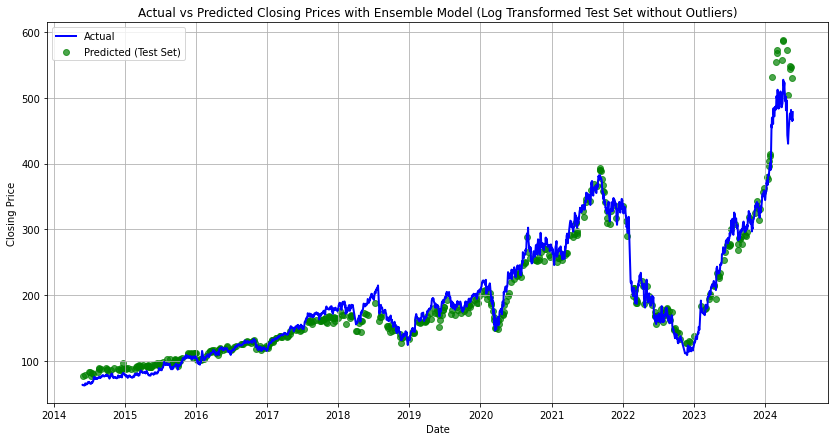

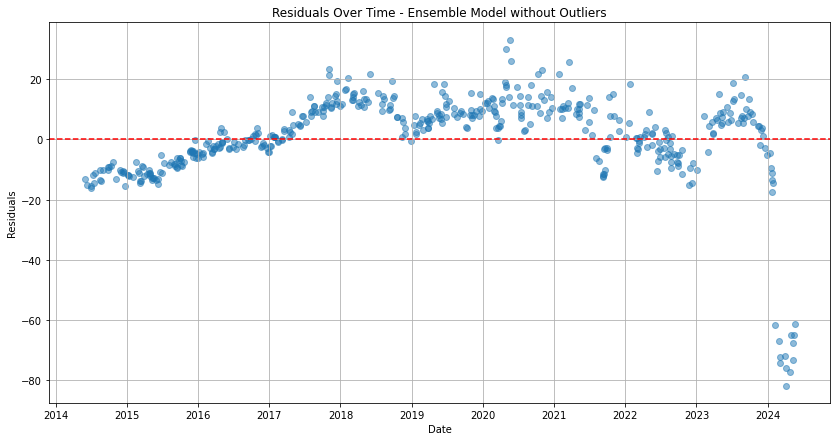

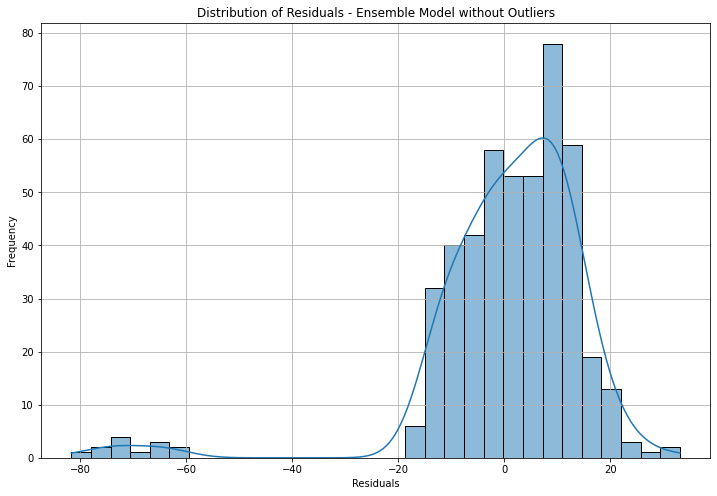

In [50]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

# Split scaled data into training, validation, and test sets with indices
X_train_no_outliers, X_remaining_no_outliers, y_train_log_no_outliers, y_remaining_log_no_outliers, train_indices, remaining_indices = train_test_split(
    X_scaled_no_outliers, y_log_no_outliers, data_no_outliers.index, test_size=0.4, random_state=42)

X_val_no_outliers, X_test_no_outliers, y_val_log_no_outliers, y_test_log_no_outliers, val_indices, test_indices = train_test_split(
    X_remaining_no_outliers, y_remaining_log_no_outliers, remaining_indices, test_size=0.5, random_state=42)

# Final Model Evaluation
print(f"Ensemble Validation MSE without Outliers: {mse_val_ensemble_no_outliers}")
print(f"Ensemble Validation R-squared without Outliers: {r2_val_ensemble_no_outliers}")
print(f"Ensemble Test MSE without Outliers: {mse_test_ensemble_no_outliers}")
print(f"Ensemble Test R-squared without Outliers: {r2_test_ensemble_no_outliers}")

# Visualize final test results
test_dates_adjusted = data_no_outliers.loc[test_indices, 'Date']

plt.figure(figsize=(14, 7))
plt.plot(data_no_outliers['Date'], data_no_outliers['Close'], label='Actual', linewidth=2, color='blue')
plt.scatter(test_dates_adjusted, np.expm1(y_test_pred_ensemble_no_outliers), label='Predicted (Test Set)', color='green', alpha=0.7)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend()
plt.title('Actual vs Predicted Closing Prices with Ensemble Model (Log Transformed Test Set without Outliers)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

# Residuals Over Time
residuals_no_outliers = np.expm1(y_test_log_no_outliers) - np.expm1(y_test_pred_ensemble_no_outliers)
plt.figure(figsize=(14, 7))
plt.scatter(test_dates_adjusted, residuals_no_outliers, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Over Time - Ensemble Model without Outliers')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Distribution of Residuals
plt.figure(figsize=(12, 8))
sns.histplot(residuals_no_outliers, kde=True)
plt.title('Distribution of Residuals - Ensemble Model without Outliers')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Validation MAPE: 5.47%
Test MAPE: 5.69%


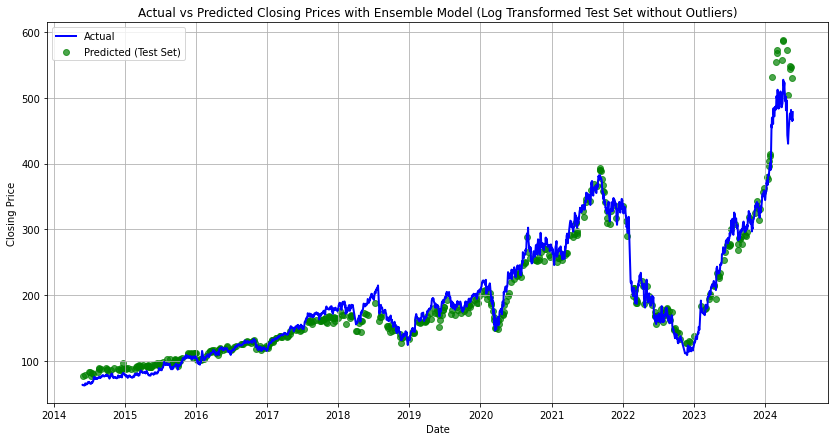

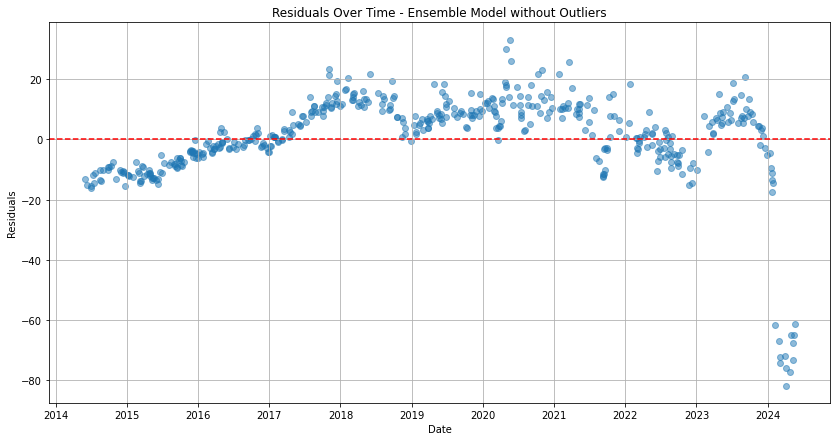

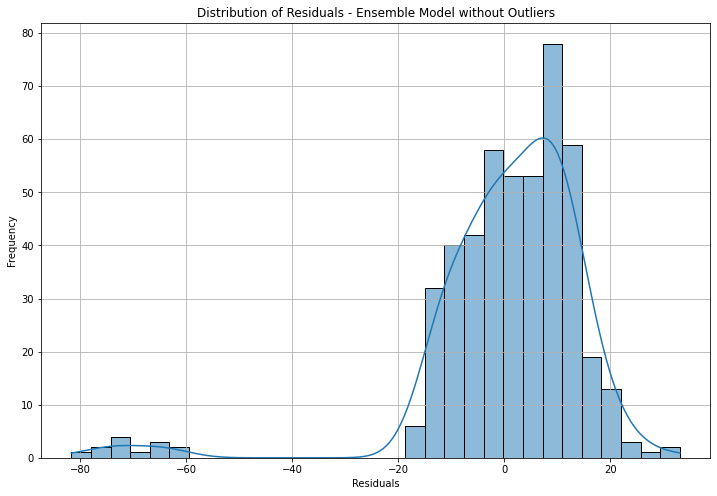

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE for validation set
y_val_true = np.expm1(y_val_log_no_outliers)
y_val_pred = np.expm1(y_val_pred_ensemble_no_outliers)
mape_val = mean_absolute_percentage_error(y_val_true, y_val_pred)
print(f"Validation MAPE: {mape_val:.2f}%")

# Calculate MAPE for test set
y_test_true = np.expm1(y_test_log_no_outliers)
y_test_pred = np.expm1(y_test_pred_ensemble_no_outliers)
mape_test = mean_absolute_percentage_error(y_test_true, y_test_pred)
print(f"Test MAPE: {mape_test:.2f}%")

# Visualization
plt.figure(figsize=(14, 7))
plt.plot(data_no_outliers['Date'], data_no_outliers['Close'], label='Actual', linewidth=2, color='blue')
plt.scatter(test_dates_adjusted, np.expm1(y_test_pred_ensemble_no_outliers), label='Predicted (Test Set)', color='green', alpha=0.7)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend()
plt.title('Actual vs Predicted Closing Prices with Ensemble Model (Log Transformed Test Set without Outliers)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

# Residuals Over Time
residuals_no_outliers = y_test_true - y_test_pred
plt.figure(figsize=(14, 7))
plt.scatter(test_dates_adjusted, residuals_no_outliers, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Over Time - Ensemble Model without Outliers')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Distribution of Residuals
plt.figure(figsize=(12, 8))
sns.histplot(residuals_no_outliers, kde=True)
plt.title('Distribution of Residuals - Ensemble Model without Outliers')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [52]:
# Calculate MAPE for validation set
mape_val = mean_absolute_percentage_error(y_val_true, y_val_pred)
accuracy_val = 100 - mape_val
print(f"Validation MAPE: {mape_val:.2f}%")
print(f"Validation Accuracy: {accuracy_val:.2f}%")

# Calculate MAPE for test set
mape_test = mean_absolute_percentage_error(y_test_true, y_test_pred)
accuracy_test = 100 - mape_test
print(f"Test MAPE: {mape_test:.2f}%")
print(f"Test Accuracy: {accuracy_test:.2f}%")


Validation MAPE: 5.47%
Validation Accuracy: 94.53%
Test MAPE: 5.69%
Test Accuracy: 94.31%
